<a href="https://colab.research.google.com/github/mkgreen/NLP-Amazon-Reviews/blob/main/NLP_project_Amazon_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**From Project Instructions:**

# NLP Project

## **Amazon Fine Food Reviews Analysis** 

Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews

**Objective:**

Given a review, determine whether the review is positive or negative.
- **How to determine if a review is positive or negative?**

We could use the Score/Rating. A rating of 4 or 5 could be cosnidered a positive review. A review of 1 or 2 could be considered negative. A review of 3 is nuetral and ignored. This is an approximate and proxy way of determining the polarity (positivity/negativity) of a review.


# **Dataset**

This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

**Attribute Information:**

There are a total of 10 columns in total in the Amazon Fine Food review dataset.

- Id : Row Id
- ProductId : Unique identifier for the product.
- UserId : Unique identifier for the user.
- ProfileName : Profile Name of the User.
- HelpfulnessNumerator : Number of users who found the review helpful.
- HelpfulnessDenominator : Number of users who indicated whether they found the review helpful or not.
- Score : Rating between 1 and 5.
- Time : Timestamp for the review.
- Summary : Brief summary of the review.
- Text : Text of the review.

# The Plan
1. **Collect the data**: We will need to find a source of Amazon food reviews and retrieve the data. Amazon has a public dataset on AWS that includes food reviews, but we can also scrape the data from the Amazon website using Python.

2. **Explore the data**: Once we have the data, we will need to explore it to understand its structure, contents, and quality. We can use Python libraries such as Pandas, NumPy, and Matplotlib to perform exploratory data analysis (EDA).

3. **Clean the data**: We may need to clean the data to remove irrelevant or inaccurate information, handle missing values, and remove duplicates. We can use Pandas and other Python libraries to clean and preprocess the data.

4. **Transform the data**: We may need to transform the data into a format that is suitable for analysis. For example, we may need to convert text reviews into numerical features using techniques such as tokenization, stemming, and TF-IDF.

5. **Perform analysis**: We can use Python libraries such as Scikit-Learn and NLTK to perform sentiment analysis, topic modeling, and other types of analysis on the food reviews.

6. **Visualize the results**: We can use Python libraries such as Matplotlib and Seaborn to create visualizations that help us understand and communicate the results of our analysis.



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
reviews_df = pd.read_csv("/content/Reviews.csv")

# Preview the dataset
reviews_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
reviews_df.shape

(568454, 10)

The data contains ten columns, as described in the dataset description. Each row represents a product review, with information about the user, product, rating, and text of the review. 

The HelpfulnessNumerator and HelpfulnessDenominator columns are used to calculate the helpfulness of a review. The Score column represents the rating given by the user, with one being the lowest and five being the highest. The Time column contains the timestamp of the review. Finally, the Summary and Text columns include the summary and full text of the review, accordingly.

# Cleaning and Preprocessing the Data


Remove duplicates, handle missing values, and convert the text reviews into numerical features using the TF-IDF vectorization technique

In [10]:
# Remove duplicates
reviews_df.drop_duplicates(subset=["UserId", "ProfileName", "Time", "Text"], inplace=True)

# Handle missing values 
reviews_df.dropna(subset=["Summary", "Text"], inplace=True)

# Convert text reviews into numerical features using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words="english")
X = tfidf.fit_transform(reviews_df["Text"])
y = np.where(reviews_df["Score"] >= 4, 1, 0)

I have now created X and y arrays, representing the input data (text reviews transformed into numerical features using TF-IDF) and the target data (binary labels indicating positive or negative sentiment).

I will split the data into training and testing sets using Scikit-Learn's train_test_split function:



In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Next, I will train a machine learning model on the training data and evaluate its performance on the testing data. I am using a logistic regression model, which is a simple yet effective model for binary classification tasks.

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.886
Confusion matrix:
[[16716  9553]
 [ 3891 88019]]



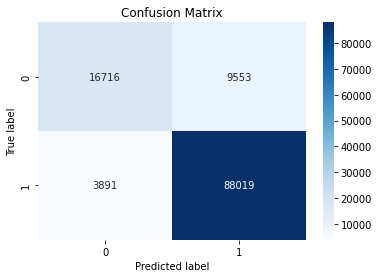

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Train a logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lr.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print(f"Confusion matrix:\n{confusion}")
print("")

sns.heatmap(confusion, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

The accuracy of the model is 0.886, which means that 88.6% of the reviews were correctly classified as positive or negative based on their rating.

The confusion matrix shows the number of true positive (16716), true negative (88019), false positive (9553), and false negative (3891) predictions made by the model. The true positive and true negative values indicate the number of reviews correctly classified as positive and negative, respectively. Conversely, the false positive and false negative values indicate the number of reviews incorrectly classified as positive and negative.

The last line of the output is a warning message that the lbfgs solver used in the logistic regression model failed to converge, which means that the model did not reach the optimal solution. The message suggests increasing the number of iterations or scaling the data to improve the model performance. It also suggests referring to the documentation for alternative solver options.

---
### What's next?

how you can improve the results of your sentiment analysis model:

1. Data Cleaning: Cleaning the text data can help improve the accuracy of the model. This includes removing stop words, punctuation, and other non-relevant information from the text. You can also apply techniques such as stemming and lemmatization to reduce the number of unique words in the data.

2. Feature Engineering: Consider adding more features to the model that can help improve its accuracy. For example, you can create features such as the length of the review, the number of positive and negative words in the review, or the presence of specific keywords in the review.

3. Model Selection: Consider using other classification algorithms such as Random Forest, Naive Bayes, or SVM to see if they perform better than logistic regression on this dataset.

4. Hyperparameter Tuning: Experiment with different hyperparameters for the logistic regression model to see if you can improve the accuracy. For example, you can try different values for the regularization parameter C or change the solver algorithm.

5. Balancing the Dataset: If the dataset is imbalanced, meaning that one class has significantly more data points than the other, consider using techniques such as oversampling or undersampling to balance the dataset. This can help improve the accuracy of the model on the minority class.

6. Domain-Specific Features: If you have domain-specific knowledge about the products being reviewed, you can create features that capture specific aspects of the products that are important to customers. For example, if you are analyzing food reviews, you can create features that capture the taste, texture, or freshness of the food.

